# UFRN Analytics

### Análise sobre os dados de Pesquisa

- Bancos de relacionados a <b>Pesquisa</b> no Portal de Dados Abertos da UFRN:


[<b>Pesquisadores:</b>](http://dados.ufrn.br/dataset/pesquisadores) Relação de pesquisadores da UFRN  
[<b>Bolsistas de Iniciação Científica:</b>](http://dados.ufrn.br/dataset/bolsistas-de-iniciacao-cientifica) Relação de bolsistas de iniciação científica de projetos de pesquisa da UFRN  
[<b>Projetos de Pesquisa:</b>](http://dados.ufrn.br/dataset/projetos-de-pesquisa) Relação de projetos de pesquisa realizados na UFRN  
[<b>Grupos de Pesquisa:</b>](http://dados.ufrn.br/dataset/grupos-de-pesquisa) Relação de grupos de pesquisa da UFRN  


- Outros bancos de dados relevantes:

[<b>Docentes:</b>](http://dados.ufrn.br/dataset/docentes/resource/ff0a457e-76fa-4aca-ad99-48aebd7db070) Docentes da UFRN

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import re
%matplotlib inline

In [3]:
pesquisadores = pd.read_csv('pesquisadores.csv',delimiter=';')
pesquisadores.head()

,id_servidor,nome,unidade,centro,coordenador,internos,externos,Unnamed: 7
0,23906,ADA CRISTINA SCUDELARI,DEPARTAMENTO DE ENGENHARIA CIVIL,CENTRO DE TECNOLOGIA,3,1,4,NaN
1,5754609,ADAILDO GOMES D ASSUNCAO,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES,CENTRO DE TECNOLOGIA,1,0,1,NaN
2,5757049,ADALA NAYANA DE SOUSA MATA,ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO G...,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,1,1,0,NaN
3,5757114,ADA LIMA FERREIRA DE SOUSA,ESCOLA DE CIÊNCIAS E TECNOLOGIA,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,0,1,0,NaN
4,5757842,ADAMO PERRUCCI,DEPARTAMENTO DE DIREITO PROCESSUAL E PROPEDÊUT...,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,0,1,0,NaN


In [4]:
bolsistas = pd.read_csv('bolsistas-de-iniciacao-cientifica.csv',delimiter=';')
bolsistas.head()

,matricula,discente,titulo,codigo_projeto,ano,orientador,categoria,tipo_de_bolsa,linha_pesquisa,base_pesquisa,cota,inicio,fim,unidade,status,Unnamed: 15
0,200504593,ABDON SILVA RIBEIRO DA CUNHA,Geração e disseminação da inovação na carcinic...,PVE2463-2008,2008,MARIANA BALDI,Iniciação Científica (IC),PIBIC,Organizações e comportamento organizacional,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2008-2009,2008-08-25,2008-11-06 13:35:24.877,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO,NaN
1,200504593,ABDON SILVA RIBEIRO DA CUNHA,ELEMENTOS DO COMPORTAMENTO ORGANIZACIONAL:Tipo...,PVE513-2008,2008,WASHINGTON JOSE DE SOUSA,Iniciação Científica (IC),PIBIC,Gestão de Organizações Sociais;Trabalho Volunt...,GRUPO DE ESTUDOS E PESQUISAS EM GESTÃO INSTITU...,2008-2009,2008-11-06,2009-07-31 00:00:00,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO,NaN
2,200504593,ABDON SILVA RIBEIRO DA CUNHA,O agronegócio da carcinicultura no RN e a estr...,PVE334-2007,2007,MARIANA BALDI,Iniciação Científica (IC),PIBIC,Organizações e comportamento organizacional;;;,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2007-2008,2007-08-01,2008-07-31 00:00:00,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO,NaN
3,200504593,ABDON SILVA RIBEIRO DA CUNHA,Motivos de Adesão e Filiação ao Trabalho Volun...,PVE3275-2009,2009,WASHINGTON JOSE DE SOUSA,Iniciação Científica (IC),PIBIC,Análise e Avaliação de Políticas Públicas;;;,NaN,2009-2010,2009-08-01,2009-12-25 00:00:00,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO,NaN
4,2011049415,ABEL LUIS DA SILVA NETO,Estudo de Antenas com Reflectarrays e suas Apl...,PVG6992-2013,2013,ADAILDO GOMES D ASSUNCAO,Iniciação Tecnológica (IT),PIBIT,"ANTENAS, PROPAGAÇÃO E COMUNICAÇÕES SEM FIO",GRUPO DE MICROONDAS E ANTENAS,2013-2014,2013-08-14,2014-06-26 00:00:00,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES - DCO,PENDENTE DE RELATORIO,NaN


In [33]:
from unicodedata import normalize
def remover_acentos(txt):
    txt = str(txt)
    return normalize('NFKD', txt).encode('ASCII','ignore').decode('ASCII')

projetos = pd.read_csv('projetos-de-pesquisa.csv',delimiter=';')
projetos.area_conhecimento_cnpq = projetos.area_conhecimento_cnpq.apply(remover_acentos)

areas_cnpq = pd.read_csv('areas_cnpq.csv')
areas_cnpq.Nome = areas_cnpq.Nome.apply(remover_acentos)


In [35]:


projetos[(~projetos.area_conhecimento_cnpq.isin(areas_cnpq.Nome))]

,codigo_projeto,titulo,palavras_chave,situacao,ano,data_inicio,data_fim,tipo_projeto,unidade,coordenador,edital,grupo_pesquisa,linha_pesquisa,area_conhecimento_cnpq
42,PVA14354-2017,Percepção e reflexões a respeito dos resíduos ...,Educação Ambiental. Educação em saúde. Resíduo...,EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE MICROBIOLOGIA E PARASITOLOGIA,MARIA DE FATIMA DE SOUZA,(2017) Edital N° 01/2017 - Edital de Bolsas de...,SustentAção - Grupo de Pesquisa e Extensão em ...,Sustentabilidade e Formação Profissional,Multidisciplinar
59,PVA14579-2017,CONTRIBUIÇÕES DA EDUCAÇÃO PARA A SUSTENTABILID...,"educação para a sustentabilidade, vulnerabilid...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE MICROBIOLOGIA E PARASITOLOGIA,MAGNOLIA FERNANDES FLORENCIO DE ARAUJO,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Educação em biologia,Desenvolvimento de estratégias didáticas para...,Ciencias Ambientais
92,PVB14053-2017,TRANSPORTE TÉRMICO E ELETRÔNICO EM MATERIAIS B...,"condutividade térmica, condutividade eletrônic...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,LUIZ FELIPE CAVALCANTI PEREIRA,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Grupo de transporte em nanoestruturas,Transporte eletrônico em materiais bidimension...,Propriedades de Transportes de Materia Condens...
141,PVC13404-2017,"DIREITOS HUMANOS, SAÚDE MENTAL E DROGAS EM CON...","DIREITOS HUMANOS, SAÚDE MENTAL, DROGAS, VULNER...",RENOVADO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE PSICOLOGIA,ANA KARENINA DE MELO ARRAES AMORIM,(2016) Edital N° 01/2016 - Edital de Bolsas de...,OBSERVATÓRIO DE SAÚDE MENTAL,SAÚDE MENTAL/ÁLCOOL E OUTRAS DROGAS,"Papeis e Estruturas Sociais, Individuo"
203,PVC14678-2017,PERFIL DAS JUVENTUDES POTIGUARES:As juventudes...,"Juventude, políticas públicas, direitos humanos",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE PSICOLOGIA,ILANA LEMOS DE PAIVA,(2017) Edital N° 01/2017 - Edital de Bolsas de...,GRUPO DE PESQUISAS MARXISMO E EDUCAÇÃO,"Infância, Juventude e Direitos Humanos","Papeis e Estruturas Sociais, Individuo"
211,PVC14773-2017,Uso da gamificação para aperfeiçoamento da ins...,"game design, gamificação, simuladores de voo, ...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE ARTES,DINO LINCOLN FIGUEIROA SANTOS,(2017) Edital N° 01/2017 - Edital de Bolsas de...,NDIS-Núcleo de Design Inovação e Sustentabilidade,"DESIGN, INOVAÇÃO E SUSTENTABILIDADE",Defesa
324,PVD14393-2017,Avaliação da influência de diferentes tipos de...,"absorção, óleos, farinhas, empanados",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE NUTRIÇÃO,THAIS SOUZA PASSOS,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Nutrição e substâncias bioativas para saúde,"Dietética, nutrição e saúde","Quimica, Fisica, Fisico-Quimica e Bioquimica d..."
345,PVD14467-2017,Previsão de Reação Adversa a Medicamento em Pa...,"Fatores de risco, farmacovigilância, reação ad...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE FARMACIA,IVONETE BATISTA DE ARAUJO,(2017) Edital N° 01/2017 - Edital de Bolsas de...,DESENVOLVIMENTO DE MEDICAMENTOS,AVALIAÇÃO E INTERVENÇÃO TERAPÊUTICA NA PRÁTICA...,Analise e Controle de Medicamentos
360,PVD14602-2017,ESTUDOS DE CARACTERIZAÇÃO FÍSICO-QUÍMICA DE CO...,"derivados do ácido cinâmico, ésteres, ácido ci...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE FARMACIA,CICERO FLAVIO SOARES ARAGAO,(2017) Edital N° 01/2017 - Edital de Bolsas de...,"Pesquisa, Tecnologia e Inovação em Controle de...",Analise e Controle de Medicamentos,Analise e Controle de Medicamentos
361,PVD14608-2017,Avaliação do teor de drogas psicotrópicas apre...,"drogas psicotrópicas, teor, Rio Grande do Norte",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE FARMACIA,LEANDRO DE SANTIS FERREIRA,(2017) Edital N° 01/2017 - Edital de Bolsas de...,"Pesquisa, Tecnologia e Inovação em Controle de...",Desenvolvimento e 

In [38]:
projetos[(~projetos.grupo_pesquisa.isin(grupos.base_pesquisa))]

,codigo_projeto,titulo,palavras_chave,situacao,ano,data_inicio,data_fim,tipo_projeto,unidade,coordenador,edital,grupo_pesquisa,linha_pesquisa,area_conhecimento_cnpq
1,PID14811-2017,Influência de fatores biológicos e ambientais ...,"linguagem infantil, desenvolvimento da linguag...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE FONOAUDIOLOGIA,ANA MANHANI CACERES ASSENCO,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Laboratório de Desenvolvimento da Linguagem,Transtorno do desenvolvimento da linguagem,Fonoaudiologia
2,PIG14434-2017,Gerenciador Inteligente de Instalações Elétric...,"Instalações elétricas, IoT, Edifícios Intelige...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,JOSE LUIZ DA SILVA JUNIOR,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Sistemas embarcados e microeletrônica,Sistemas embarcados aplicados,Automacao Eletronica de Processos Eletricos e ...
3,PIG14470-2017,Sistema inteligente para bicicletas (smart bykes),"Sistema Inteligente, bicicletas, LoRaWan, Sist...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,JOSE ALBERTO NICOLAU DE OLIVEIRA,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Sistemas embarcados e microeletrônica,Sistemas embarcados aplicados,Circuitos Eletronicos
4,PIG14713-2017,Síntese de blocos de RF integrados para aplica...,"Circuitos Integrados de Rádio-Frequência, Padr...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,VINCENT PATRICK MARIE BOURGUET,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Sistemas embarcados e microeletrônica,Microeletrônica aplicada,Circuitos Eletronicos
5,PII14130-2017,Resgate da biodiversidade de maxixeiro: Coleta...,"recursos genéticos vegetais, germoplasma, cucu...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,ESCOLA AGRÍCOLA DE JUNDIAÍ,JOSE HAMILTON DA COSTA FILHO,(2016) Edital N° 05/2016 - Edital para cadastr...,Recursos Genéticos Vegetais,Biodiversidade e Recursos Genéticos Vegetais,Melhoramento Vegetal
6,PIT14125-2017,Mais Big Data,"Big Data, engenharia automática de algoritmos,...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,INSTITUTO METROPOLE DIGITAL,LEONARDO CESAR TEONACIO BEZERRA,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Ciência Cognitiva e de Dados,Computação Cognitiva,Analise de Algoritmos e Complexidade de Comput...
8,PIT14822-2017,Aprendizado por Reforço em Jogos de Estratégia...,"Jogos de estratégia em tempo real, personagens...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,INSTITUTO METROPOLE DIGITAL,CHARLES ANDRYE GALVAO MADEIRA,(2016) Edital N° 01/2016 - Edital de Bolsas de...,Ciência Cognitiva e de Dados,Computação Cognitiva,Sistemas de Computacao
17,PVA14041-2017,Avaliação de ovinos naturalmente infectados po...,"parasitos, pastagem, marcadores fenotípicos, H...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE MICROBIOLOGIA E PARASITOLOGIA,LILIAN GIOTTO ZAROS DE MEDEIROS,(2017) Edital N° 01/2017 - Edital de Bolsas de...,////,Parasitologia e Produção Animal,Criacao de Animais
88,PVB13950-2017,Utilização de monocamadas auto-organizadas (SA...,"monocamada, sensor e óxido nítrico",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,INSTITUTO DE QUÍMICA,FRANCISCO ORDELEI NASCIMENTO DA SILVA,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Laboratório de química de coordenação e Polímeros,Química bioinorgânica,Campos de Coordenacao
92,PVB14053-2017,TRANSPORTE TÉRMICO E ELETRÔNICO EM MATERIAIS B...,"condutividade térmica, condutividade eletrônic...",EM EXECUÇÃO,2017,2017-08-01,2018-07-31,INTERNO,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,LUIZ FELIPE CAVALCANTI PEREIRA,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Grupo de transporte em nanoestruturas,Transporte eletrônico em materiais bidimension...,Propriedades de Transportes de Materia Condens...


In [10]:
projetos[projetos.tipo_projeto=='DEPARTAMENTO DE FISIOTERAPIA']

,titulo,palavras_chave,situacao,ano,data_inicio,data_fim,tipo_projeto,unidade,coordenador,edital,grupo_pesquisa,linha_pesquisa,area_conhecimento_cnpq,codigo_projeto
275,"Lombalgia, Fisioterapia e Analgesia",EM EXECUÇÃO,2017,2017.0,2018-07-31,INTERNO,DEPARTAMENTO DE FISIOTERAPIA,WOUBER HÉRICKSON DE BRITO VIEIRA,(2017) Edital N° 01/2017 - Edital de Bolsas de...,MOVIMENTO E SAÚDE,Avaliação e intervenção no sistema musculoesqu...,"Fisioterapia e Terapia Ocupacional"";",None,nan
304,Doença de Parkinson; Reabilitação; Ativação Ce...,EM EXECUÇÃO,2017,2017.0,2018-07-31,INTERNO,DEPARTAMENTO DE FISIOTERAPIA,ANA RAQUEL RODRIGUES LINDQUIST,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Saúde e Funcionalidade,Inovação Tecnológica em Saúde e Reabilitação,"Fisioterapia e Terapia Ocupacional"";",None,nan
323,"Knowledge Translation, Participação, Deficiênc...",EM EXECUÇÃO,2017,2017.0,2018-07-31,INTERNO,DEPARTAMENTO DE FISIOTERAPIA,ANA RAQUEL RODRIGUES LINDQUIST,(2017) Edital N° 01/2017 - Edital de Bolsas de...,NEURORREABILITAÇÃO,Análise do comportamento motor,"Fisioterapia e Terapia Ocupacional"";",None,nan
342,"DPOC, Reabilitação, Exercício",EM EXECUÇÃO,2017,2017.0,2019-03-30,EXTERNO,DEPARTAMENTO DE FISIOTERAPIA,GUILHERME AUGUSTO DE FREITAS FREGONEZI,NaN,Avaliação e Intervenção Fisioterapêutica nos S...,Desempenho Cardiorrespiratório nas Doenças Crô...,"Fisioterapia e Terapia Ocupacional"";",None,nan
371,"Idoso, Envelhecimento, Biomarcadores, Sarcopenia",EM EXECUÇÃO,2017,2017.0,2018-07-31,INTERNO,DEPARTAMENTO DE FISIOTERAPIA,RICARDO OLIVEIRA GUERRA,(2017) Edital N° 01/2017 - Edital de Bolsas de...,MOVIMENTO E SAÚDE,EPIDEMIOLOGIA DO ENVELHECIMENTO E FISIOTERAPIA...,"Educação Física"";",None,nan
411,"Lesão Medular, Marcha, Eletromiografia",EM EXECUÇÃO,2017,2017.0,2018-07-31,INTERNO,DEPARTAMENTO DE FISIOTERAPIA,ANA RAQUEL RODRIGUES LINDQUIST,(2017) Edital N° 01/2017 - Edital de Bolsas de...,Saúde e Funcionalidade,Inovação Tecnológica em Saúde e Reabilitação,"Fisioterapia e Terapia Ocupacional"";",None,nan
1036,"assoalho pélvico (pelvic floor), músculos abdo...",EM EXECUÇÃO,2016,2016.0,2017-07-31,INTERNO,DEPARTAMENTO DE FISIOTERAPIA,ELIZABEL DE SOUZA RAMALHO VIANA,(2016) Edital N° 01/2016 - Edital de Bolsas de...,DESENVOLVIMENTO HUMANO E FISIOTERAPIA,AVALIAÇÃO E ATENÇÃO FISIOTERAPÊUTICA EM SAÚDE ...,"Fisioterapia e Terapia Ocupacional"";",None,nan
1139,"Eletromiografia, funcionalidade lesão medular",EM EXECUÇÃO,2016,2016.0,2017-07-31,INTERNO,DEPARTAMENTO DE FISIOTERAPIA,ANA RAQUEL RODRIGUES LINDQUIST,(2016) Edital N° 01/2016 - Edital de Bolsas de...,Saúde e Funcionalidade,Inovação tecnológica em saúde,"Fisioterapia e Terapia Ocupacional"";",None,nan
1198,"Esclerose Lateral Amiotrófica; Ortese, Funcão",EM EXECUÇÃO,2016,2016.0,2018-11-01,EXTERNO,DEPARTAMENTO DE FISIOTERAPIA,ANA RAQUEL RODRIGUES LINDQUIST,NaN,Saúde e Funcionalidade,Inovação Tecnológica em Saúde e Reabilitação,"Fisioterapia e Terapia Ocupacional"";",None,nan
1768,"fisioterapia respiratória, músculos respiratór...",FINALIZADO,2015,2015.0,2016-07-31,INTERNO,DEPARTAMENTO DE FISIOTERAPIA,VANESSA REGIANE RESQUETI FREGONEZI,(2015) Edital02/2015 - Programa Institucional ...,Avaliação e Intervenção Fisioterapêutica nos S...,AVALIAÇÃO E INTERVENÇÃO EM FISIOTERAPIA RESPIR...,"Fisioterapia e Terapia Ocupacional"";",None,LATERAL AMIOTRÓFICA


In [36]:
grupos = pd.read_csv('grupos-de-pesquisa.csv',delimiter=';')
grupos.head()

,codigo,base_pesquisa,coordenador,area_conhecimento_cnpq,situacao,Unnamed: 5
0,GED239-10,Ações promocionais e de atenção a grupos human...,FRANCISCO ARNOLDO NUNES DE MIRANDA,Enfermagem,EM CONSOLIDACÃO,NaN
1,GCG111-04,AGROECOLOGIA E DESENVOLVIMENTO SUSTENTÁVEL NO ...,MAGDA MARIA GUILHERMINO,Zootecnia,CONSOLIDADO,NaN
2,GCD109-01,"ALIMENTOS, NUTRIÇÃO E SAÚDE",KARINE CAVALCANTI MAURICIO DE SENA EVANGELISTA,Nutrição,CONSOLIDADO,NaN
3,GEA282-12,"Alterações morfológicas, modulação farmacêutic...",RAIMUNDO FERNANDES DE ARAUJO JUNIOR,Morfologia,EM CONSOLIDACÃO,NaN
4,GEE404-16,"Ambiente, Turismo e Sustentabilidade",KETTRIN FARIAS BEM MARACAJA,Turismo,EM CONSOLIDACÃO,NaN


In [7]:
docentes = pd.read_csv('docentes.csv',delimiter=';')
docentes.head()

,siape,nome,tipo_jornada_trabalho,vinculo,categoria,classe_funcional,lotacao,admissao,Unnamed: 8
0,709857,MARIA NUBIA PESSOA,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO DE EX-TERRITORIO,D ...,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,2010-01-06 00:00:00,NaN
1,713506,RUTILENE SANTOS DE SOUSA,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO DE EX-TERRITORIO,D ...,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,2009-03-12 00:00:00,NaN
2,709496,ADAUTO CHIAMENTI,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DV ...,ESCOLA AGRÍCOLA DE JUNDIAÍ,1988-03-01 00:00:00,NaN
3,1543339,ADELE GUIMARAES UBARANA SANTOS,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIII ...,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,2006-07-24 00:00:00,NaN
4,1554468,AFRANIO CESAR DE ARAUJO,Dedicação exclusiva,Ativo Permanente,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,DIV ...,ESCOLA AGRÍCOLA DE JUNDIAÍ,2008-09-12 00:00:00,NaN


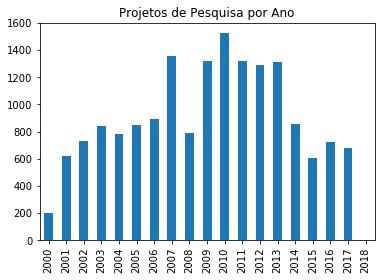

In [39]:
projetos['ano'].value_counts().sort_index().plot(kind='bar', title="Projetos de Pesquisa por Ano")

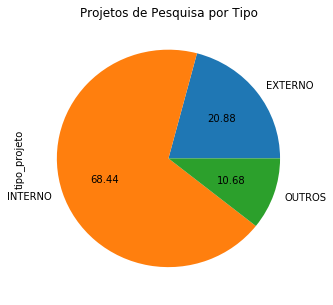

In [9]:
def func_tipo(tipo):
    tipo=str(tipo)
    if ((tipo!='INTERNO') & (tipo!='EXTERNO')):
        tipo='OUTROS'
    return tipo
projetos['tipo_projeto'].apply(func_tipo).value_counts().sort_index().plot(kind='pie', autopct='%.2f', figsize=(5,5), title="Projetos de Pesquisa por Tipo")

In [ ]:
grandes_areas_cnpq.loc[grandes_areas_cnpq['Nome']=='Lógica Matemática','Grande Área']

In [ ]:
grandes_areas_cnpq = pd.read_excel('TabeladeAreasdoConhecimento.xls')
def func_grande_area_cnpq(area):
    tipo=str(area)
    return grandes_areas_cnpq[grandes_areas_cnpq['Nome']==area]['Grande Área']



grupos['area_conhecimento_cnpq'].apply(func_grande_area_cnpq).value_counts().plot(kind='bar', figsize=(20,10), title="Grupos de Pesquisa por Área do Conhecimento")

In [ ]:
grandes_areas_cnpq.iloc[0,1]

In [ ]:
projetos['unidade'].value_counts()[projetos['unidade'].value_counts()>10].plot(kind='bar', figsize=(20,10), title="Projetos de Pesquisa por Unidade\n(apenas unidades com mais de 10 projetos registrados)")

In [ ]:
bolsistas.groupby('ano').count()['matricula'].plot(kind='bar', title='Bolsistas de IC por Ano')

In [ ]:
projetos[projetos['ano']==dt.datetime(2017,1,1).year]['unidade'].value_counts()[projetos['unidade'].value_counts()>10].plot(kind='bar', figsize=(20,10), title="Projetos de Pesquisa por Unidade em 2017")

In [ ]:
from collections import Counter
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopw = set(stopwords.words('portuguese'))
stopw.add("none")
#from string import digits
text = projetos['palavras_chave'].to_string().lower()

text = ' '.join([word for word in text.split() if word not in stopw])

text = ''.join(i for i in text if not i.isdigit())
#text = ''.join(ch for ch in text if ch not in set(string.punctuation))
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
text = text.translate(translator)
text = text.split()

text_dict = Counter(text)

# WordCloud module: https://github.com/amueller/word_cloud
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', height=1000, width=2500).generate_from_frequencies(text_dict)
plt.figure(1,[100,250])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
Classificar departamentos pelo indice: numero de projetos/numero de docentes
Classificar departamentos pelo percentual de docentes coordenando projeto de pesquisa
em execuçao
desde 2010
sempre

In [11]:
pesquisadores[pesquisadores['nome']=='ADAILDO GOMES D ASSUNCAO']

,id_servidor,nome,unidade,centro,coordenador,internos,externos,Unnamed: 7
1,5754609,ADAILDO GOMES D ASSUNCAO,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES,CENTRO DE TECNOLOGIA,1,0,1,NaN


In [12]:
projetos[projetos['coordenador']=='ADAILDO GOMES D ASSUNCAO']

,titulo,palavras_chave,situacao,ano,data_inicio,data_fim,tipo_projeto,unidade,coordenador,edital,grupo_pesquisa,linha_pesquisa,area_conhecimento_cnpq,codigo_projeto
4257,"DESENVOLVIMENTO DE ANTENAS, FSS E CIRCUITOS IN...","Antenas, FSS, Propagação, Comunicações sem fio...",RENOVADO,2013.0,2016-08-01,2019-07-31,EXTERNO,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,"ANTENAS, PROPAGAÇÃO E COMUNICAÇÕES SEM FIO",Telecomunicações,PVG6992-2013
5716,"DESENVOLVIMENTO DE ANTENAS, FSS E CIRCUITOS IN...","Antenas, FSS, Propagação, Comunicações sem fio...",RENOVADO,2012.0,2012-08-01,2013-07-31,EXTERNO,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,"ANTENAS, PROPAGAÇÃO E COMUNICAÇÕES SEM FIO",Telecomunicações,PVG6992-2012
7093,Desenvolvimento de FSS e Reflectarrays Fractai...,"Superfícies Seletivas de Frequência, FSS, Refl...",EM EXECUÇÃO,2011.0,2011-08-01,2012-07-31,INTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,ADAILDO GOMES D ASSUNCAO,(2011) Edital PIBIC/PIBIC-AA/PIBITI-2011-2012,GRUPO DE MICROONDAS E ANTENAS,Antenas Integradas para Sistemas de Comunicações,Telecomunicações,PVG4791-2011
7168,"DESENVOLVIMENTO DE ANTENAS, FSS E CIRCUITOS IN...","Antenas, FSS, Propagação, Comunicações sem fio...",RENOVADO,2011.0,2010-03-01,2015-02-28,EXTERNO,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,"ANTENAS, PROPAGAÇÃO E COMUNICAÇÕES SEM FIO",Telecomunicações,PVG6992-2011
8833,Desenvolvimento de FSS e Reflectarrays Fractai...,"Superfícies Seletivas de Frequência, FSS, Refl...",RENOVADO,2010.0,2010-01-01,2010-12-31,INTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,ADAILDO GOMES D ASSUNCAO,(2010) EDITAL PROPESQ 02/2010,GRUPO DE MICROONDAS E ANTENAS,Antenas Integradas para Sistemas de Comunicações,Telecomunicações,PVG4791-2010
10275,DESENVOLVIMENTO DE CIRCUITOS PLANARES E CARACT...,"Antenas, comunicações sem fio, propagação, FSS...",EM EXECUÇÃO,2009.0,2007-03-01,2010-02-28,EXTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,Circuitos Integrados de Microondas;Dispositivo...,"Teoria Eletromagnetica, Microondas, Propagação...",PVG2047-2009
11214,DESENVOLVIMENTO DE CIRCUITOS PLANARES E CARACT...,"Antenas, comunicações sem fio, propagação, FSS...",RENOVADO,2008.0,2007-03-01,2010-02-28,EXTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,Circuitos Integrados de Microondas;Dispositivo...,"Teoria Eletromagnetica, Microondas, Propagação...",PVG2047-2008
11215,DESENVOLVIMENTO DE CIRCUITOS E CARACTERIZAÇÃO ...,propagacao e comunicacoes sem fio; Antenas; FSS,FINALIZADO,2008.0,2006-10-01,2008-09-30,EXTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,Circuitos Integrados de Microondas;Dispositivo...,"Teoria Eletromagnetica, Microondas, Propagação...",PVG2048-2008
11216,Sistemas Inteligentes de Supervisão e Controle...,Sistemas em Chip; Sistemas de Controle e Supe...,FINALIZADO,2008.0,2006-12-01,2008-11-30,EXTERNO,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,"antenas, microondas",Automação Eletrônica de Processos Elétricos e ...,PVG2049-2008
13595,"DESENVOLVIMENTO DE ANTENAS, CIRCUITOS PLANARES...",ANTENAS INTEGRADAS;PROPAGAÇÃO;COMUNICAÇÕES MÓVEIS,FINALIZADO,2006.0,2006-08-01,2008-07-01,EXTERNO,CT VICE-DIRETORIA,ADAILDO GOMES D ASSUNCAO,NaN,GRUPO DE MICROONDAS E ANTENAS,"antenas, microondas",Telecomunicações,PVG341-2006


<iframe width="900" height="800" frameborder="0" scrolling="no" src="//plot.ly/~ycaroravel/80.embed"></iframe>